# Getting started with TensorFlow

## Table of Contents

1. Introduction to TensorFlow
2. But what is TensorFlow?
3. Advantages of using TensorFlow
4. Components of TensorFlow: Tensors and Graphs
5. A typical work"flow" of tensorflow
6. Basic operations - add two numbers in TensorFlow
7. Exercise - 1
8. Data Representation in TensorFlow
10. Exercise - 2
11. Build a linear regression model on Height vs Weight dataset 


## 1. Introduction to TensorFlow

Lets start with the official definition,

    “TensorFlow is an open source software library for numerical computation using dataflow graphs. Nodes in the graph represents mathematical operations, while graph edges represent multi-dimensional data arrays (aka tensors) communicated between them. The flexible architecture allows you to deploy computation to one or more CPUs or GPUs in a desktop, server, or mobile device with a single API.”
    
<img src="images/image_3.jpg" style="width: 500px;"/>

## 2. But what is Tensorflow?

If the above definition sounds a bit scary – don’t worry. 

Here is my simple definition – look at TensorFlow as nothing but numpy with a twist. If you have worked on numpy before, understanding TensorFlow will be a piece of cake! 

A major difference between numpy and TensorFlow is that TensorFlow follows a lazy programming paradigm. It first builds a graph of all the operation to be done, and then when a “session” is called, it “runs” the graph. It’s built to be scalable, by changing internal data representation to tensors (aka multi-dimensional arrays). Building a computational graph can be considered as the main ingredient of TensorFlow. To know more about mathematical constitution of a computational graph, [read this article](http://colah.github.io/posts/2015-08-Backprop/).

## 3. Advantages of using TensorFlow

The advantages of using TensorFlow are:

* It has an intuitive construct, because as the name suggests it has “flow of tensors”. You can easily visualize each and every part of the graph.
* Easily train on cpu/gpu for distributed computing
* Platform flexibility. You can run the models wherever you want, whether it is on mobile, server or PC.

## 4. Components of TensorFlow: Tensors and Graphs

In order to understand TensorFlow one needs to understand Tensors and Graphs. These are two basic things Google tried to incorporate in it’s Deep Learning framework.

Let us first understand what Tensors are. 

<img src="images/image_2.png" alt="Drawing" style="width: 200px;"/>

As per the wiki definition of Tensors:

    Tensors are geometric objects that describe linear relations between geometric vectors, scalars, and other tensors. Elementary examples of such relations include the dot product, the cross product, and linear maps. Geometric vectors, often used in physics and engineering applications, and scalars themselves are also tensors.

As the definition goes, Tensors as Multidimensional Arrays which can be used to represent mathematical values.

On th other hand, A computational graph is a series of TensorFlow operations arranged into a graph of nodes.

![image 1](images/image_1.gif)

Both of these concepts used together forms the bread and butter of TensorFlow

## 5. A Typical Work"flow" of TensorFlow

1. **Import tensorflow** along with all the necessary libraries
2. **Build a computational graph** which contains the equations we will run in the graph
3. **Initialize variables** in the graph
4. **Create a session** for running the graph 
5. **Run the graph!**
6. **Close session**

## 6. Basic operations - add two numbers in TensorFlow

**Question:** Add two numbers (2 and 3) and print the result

In [1]:
# import tensorflow
import tensorflow as tf

In [2]:
# build computational graph
num1 = tf.constant(2, dtype=tf.int16, name='num1')
num2 = tf.constant(3, dtype=tf.int16, name='num2')

addition = tf.add(num1, num2)

In [3]:
# initialize variables
init = tf.global_variables_initializer()

In [4]:
# create session and run the graph
with tf.Session() as sess:
    sess.run(init)
    print("Addition of 2 and 3 is %i" % sess.run(addition))

Addition of 2 and 3 is 5


In [5]:
# close session
sess.close()

## 7. Exercise - 1

Question: Multiply two numbers (2 and 10) and print the result

In [6]:
# Multiply
num1 = tf.constant(2, dtype=tf.int16, name='num1')
num2 = tf.constant(10, dtype=tf.int16, name='num2')

multiplication = tf.multiply(num1, num2)

# initialize variable
init = tf.global_variables_initializer()

# run the graph
with tf.Session() as sess:
    sess.run(init)
    print("Multiplication of 2 and 10 is "+ str(sess.run(multiplication)))
    
# close Session
sess.close()

Multiplication of 2 and 10 is 20


## 8. Data Representation in TensorFlow

As we saw before, constants are predefined in the program and used in the graph as input. But what if we want to change the value of a constant? Practically, tensorflow does not allow you to change the value of a tensorflow contant once it is defined. It instead provides other data representation mechanism to input the required values.

In tensorflow, we can represent data in three main formats:
    
1. **Constants** - Data values once set cannot be changed
2. **Variables** - You can change the value of the data in the same session. 
3. **Placeholders** - You can give the value as an input at runtime

Let's see by example, how variables and placeholders are used.

In [7]:
# build graph using variables
var1 = tf.Variable(2, name="var1") 
var2 = tf.Variable(3, name="var2")

mulv = tf.multiply(var1, var2)

update = var1.assign(3)

mulv2 = tf.multiply(var1, var2)

print (mulv)

Tensor("Mul_1:0", shape=(), dtype=int32)


In [8]:
# initialize variables
init = tf.global_variables_initializer()

In [9]:
# create session and run the graph
with tf.Session() as sess:
    sess.run(init)
    print ("The variable var1 is:", sess.run(var1))
    print ("The variable var2 is:", sess.run(var2))
    print ("The computational result is:", sess.run(mulv))
    sess.run(update)
    print ("The computational result after update is:", sess.run(mulv2))
    
# close session
sess.close()

The variable var1 is: 2
The variable var2 is: 3
The computational result is: 6
The computational result after update is: 9


Now lets see how we can use placeholders in our code

In [10]:
# build graph using placeholders
pl = tf.placeholder(tf.float32, shape=(3, 1)) 
pi = tf.constant([[1., 2., 3.]]) 
c = tf.matmul(pl, pi)
 
# initialize variables
init = tf.global_variables_initializer()

# create and run session
with tf.Session() as sess:
    sess.run(init)
    # give value at runtime
    print("The calculation result is:")
    print(sess.run(c, feed_dict={pl:[[3], [2], [1]]}))
    
# close session
sess.close()

The calculation result is:
[[ 3.  6.  9.]
 [ 2.  4.  6.]
 [ 1.  2.  3.]]


## 9. Exercise - 2

**Question 1**: Define 2 matrices

a = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]

b = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]

where a will be defined beforehand and b will be given as input at runtime.

Multiply a and b.

**Question 2**: Update the value of a as 

a = [[0, 0, 1], [0, 1, 0], [1, 0, 0]]

And then Multiply a and b.

In [11]:
# Question 1
a = tf.Variable([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
b = tf.placeholder(tf.int32, shape = (3, 3))

c = tf.matmul(a, b)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    print("Result is: "+str(sess.run(c, feed_dict={b: [[1, 2, 3], [4, 5, 6], [7, 8, 9]]})))

Result is: [[1 2 3]
 [4 5 6]
 [7 8 9]]


In [12]:
# Question 2
update = a.assign([[0, 0, 1], [0, 1, 0], [1, 0, 0]])

with tf.Session() as sess:
    # Not initinaialing because I have done this in Question 1
    sess.run(update)
    print("updated result is: "+str(sess.run(c, feed_dict = {b: [[1, 2, 3], [4, 5, 6], [7, 8, 9]]})))

sess.close()

updated result is: [[7 8 9]
 [4 5 6]
 [1 2 3]]


## 11. Build a linear regression model on Height vs Weight dataset 

Let us now see how we can build a regression model in TensorFlow

In [13]:
# import libraries
% pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


C:\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['pi']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [14]:
# load data
data = pd.read_csv('datasets/height_n_weight/height_n_weight.csv')

In [15]:
# see how our data looks like
data.head()

,height,weight
0,182,77
1,161,58
2,161,53
3,177,68
4,157,59


In [16]:
# define dependent and independent variables
train_x = data.height.values.ravel()
train_y = data.weight.values.ravel()

num_records = data.shape[0]

In [17]:
## Build computational graph
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# define weight and bias
W = tf.Variable(tf.random_normal(shape=(1,)), name="weight")
b = tf.Variable(tf.random_normal(shape=(1,)), name="bias")

# define parameters
learning_rate = 0.01
epochs = 50
display_step = 5

In [18]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [19]:
# define cost
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*num_records)
# define optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [20]:
# initialize variables
init = tf.global_variables_initializer()

Epoch: 5 cost = 62.91064
Epoch: 10 cost = 62.90454
Epoch: 15 cost = 62.89844
Epoch: 20 cost = 62.89234
Epoch: 25 cost = 62.88622
Epoch: 30 cost = 62.88015
Epoch: 35 cost = 62.87403
Epoch: 40 cost = 62.86796
Epoch: 45 cost = 62.86184
Epoch: 50 cost = 62.85575

Training finished!
Cost after training =  62.8558 W =  [ 0.41094142] b =  [-1.58619022]


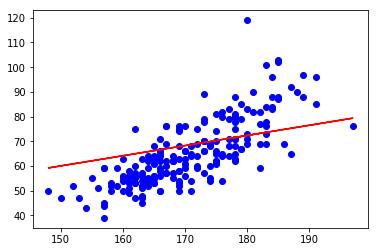

In [21]:
# create session and run the model
with tf.Session() as sess:
    sess.run(init)
    
    # Fit all training data
    for epoch in range(epochs):
        # take batch input
        for (x, y) in zip(train_x, train_y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # Display performace after 5 epochs
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_x, Y:train_y})
            print("Epoch:", '%d' % (epoch+1), "cost =", "{:.5f}".format(c))

    print()
    print("Training finished!")
    training_cost = sess.run(cost, feed_dict={X: train_x, Y: train_y})
    print("Cost after training = ", training_cost, "W = ", sess.run(W), "b = ", sess.run(b))

    # display graph
    plt.plot(train_x, train_y, 'bo')
    plt.plot(train_x, sess.run(W) * train_x + sess.run(b), 'r')
    plt.show()

## Thank you!